## Q1 Preprocessing

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [305]:
def process_dating(input_file, output_file: str):
    # Read the dataset and select the first 6500 rows
    df = pd.read_csv(input_file).head(6500)
    
# Function to remove quotes and count changes
    def remove_quotes(df, columns):
        changed_cells = 0
        def strip_quotes(cell_value):
            nonlocal changed_cells
            if isinstance(cell_value, str) and (cell_value.startswith("'") or cell_value.endswith("'")):
                cleaned_value = cell_value.strip("'")
                if cleaned_value != cell_value:
                    changed_cells += 1
                return cleaned_value
            return cell_value

        for col in columns:
            df[col] = df[col].apply(strip_quotes)
    # Apply the quote removal
    remove_quotes(df, ['race', 'race_o', 'field'])
    
# Function to convert the 'field' column to lowercase
    def standardize_lowercase(df, column):
        changed_cells_lowercase = 0
        def to_lower(cell_value):
            nonlocal changed_cells_lowercase
            if isinstance(cell_value, str) and cell_value != cell_value.lower():
                changed_cells_lowercase += 1
                return cell_value.lower()
            return cell_value

        df[column] = df[column].apply(to_lower)

    # Apply lowercase conversion
    standardize_lowercase(df, 'field')

# Function to normalize scores for specified columns
    def normalize_scores(df, columns, total_column):
        df[total_column] = df[columns].sum(axis=1) # axis =1 means "across columns",For example, if columns = ['math', 'science', 'english'], 
                                                   # this will calculate the sum of these three scores for each row.
        for col in columns:
            df[col] = df[col] / df[total_column]
    
    # Normalize the participant and partner scores
    participant_columns = ['attractive_important', 'sincere_important', 'intelligence_important', 
                           'funny_important', 'ambition_important', 'shared_interests_important']
    partner_columns = ['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 
                       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests']
    
    normalize_scores(df, participant_columns, 'participant_total')
    normalize_scores(df, partner_columns, 'partner_total')
    
    # Remove 'participant_total' and 'partner_total' columns before saving
    df.drop(columns=['participant_total', 'partner_total'], inplace=True)
# Save the cleaned data to a new CSV file
    df.to_csv(output_file, index=False)

In [307]:
# call process_dating_csv function 
process_dating('dating-full.csv', 'dating.csv')

In [309]:
# Function to map vector for categorical attributes
def one_hot_manual(df, column_name):
    # Sort the categories lexicographically
    unique_values = sorted(df[column_name].unique())
    
    # Create a dictionary to map each category to its one-hot encoding, excluding the last one
    encoding_map = {}
    for i, value in enumerate(unique_values[:-1]):  # Leave out the last category for all zeros
        one_hot_vector = [0] * (len(unique_values) - 1)
        one_hot_vector[i] = 1
        encoding_map[value] = one_hot_vector
    
    # Last category is the reference (mapped to all zeros)
    encoding_map[unique_values[-1]] = [0] * (len(unique_values) - 1)
    
    return encoding_map

df = pd.read_csv('dating.csv')

columns_to_encode = ['gender', 'race', 'race_o', 'field']
mappings = {}

for col in columns_to_encode:
    mappings[col] = one_hot_manual(df,col)
    df[col] = df[col].map(mappings[col])
df.to_csv("dating_categorical.csv", index=False)

# Obtain the encoding maps for the specific columns BEFORE they are dropped
gender_map = one_hot_manual(pd.read_csv('dating.csv'), 'gender')
race_map = one_hot_manual(pd.read_csv('dating.csv'), 'race')
race_o_map = one_hot_manual(pd.read_csv('dating.csv'), 'race_o')
field_map = one_hot_manual(pd.read_csv('dating.csv'), 'field')

# Print the required vectors
print(f"Mapped vector for 'female' in column gender: {gender_map['female']}")
print(f"Mapped vector for 'Black/African American' in column race: {race_map['Black/African American']}")
print(f"Mapped vector for 'Other' in column race_o: {race_o_map['Other']}")
print(f"Mapped vector for 'economics' in column field: {field_map['economics']}")

Mapped vector for 'female' in column gender: [1]
Mapped vector for 'Black/African American' in column race: [0, 1, 0, 0]
Mapped vector for 'Other' in column race_o: [0, 0, 0, 0]
Mapped vector for 'economics' in column field: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Q2 Implement Logistic Regression and Linear SVM

In [311]:
def split_train_test(input_file: str, train_file: str, test_file: str):
    # Read the dataset from the CSV file
    df = pd.read_csv(input_file)
    
    # Randomly sample 20% of the data for the test set using random_state=47
    test_set = df.sample(frac=0.2, random_state=25)
    
    # The remaining 80% will be used as the training set
    train_set = df.drop(test_set.index)
    
    # Save the test set to a CSV file
    test_set.to_csv(test_file, index=False)
    
    # Save the training set to a CSV file
    train_set.to_csv(train_file, index=False)

# Call the function with input and output file names
split_train_test('dating_categorical.csv', 'trainingSet.csv', 'testSet.csv')

In [313]:
# Function to process the DataFrame and handle vectors
def vector_process(df):
    data_list = []
    for _, row in df.iterrows():
        combined_row = []
        for item in row:
            if isinstance(item, str) and item.startswith('[') and item.endswith(']'):
                vector_str = item[1:-1]
                vector = [float(num) for num in vector_str.split(',')]
                combined_row.extend(vector)
            else:
                combined_row.append(float(item))
        data_list.append(combined_row)
    data_array = np.array(data_list)
    return data_array

training_df = pd.read_csv('trainingSet.csv')
test_df = pd.read_csv('testSet.csv')
trainingSet = vector_process(training_df)
testSet = vector_process(test_df)

In [333]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression with gradient descent and L2 regularization
def lr(trainingSet, testSet):

    # Separate features and labels (assuming the last column is the label)
    X_train = trainingSet[:, :-1]
    y_train = trainingSet[:, -1]

    X_test = testSet[:, :-1]
    y_test = testSet[:, -1]
    
    learning_rate = 0.01
    lambda_reg = 0.01
    max_iter = 500
    tol = 1e-6
    
    # Add bias term to the features (add a column of ones)
    X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]

    # Initialize weights as a NumPy array
    weights = np.zeros(X_train.shape[1])
    
    # Gradient descent loop
    for iteration in range(max_iter):
        # Compute predictions
        z_train = np.dot(X_train, weights)
        predictions_train = sigmoid(z_train)
        
        # Compute gradient with L2 regularization
        error = predictions_train - y_train
        gradient = np.dot(X_train.T, error) / len(y_train) + lambda_reg * weights
        
        # Update weights
        new_weights = weights - learning_rate * gradient
        
        # Check for convergence (L2 norm of weight difference)
        if np.linalg.norm(new_weights - weights, 2) < tol:
            break
        
        # Update weights
        weights = new_weights
    
    # Compute accuracy on training set
    train_preds = sigmoid(np.dot(X_train, weights)) >= 0.5
    train_accuracy = np.mean(train_preds == y_train)
    
    # Compute accuracy on test set
    test_preds = sigmoid(np.dot(X_test, weights)) >= 0.5
    test_accuracy = np.mean(test_preds == y_test)

    return train_accuracy,test_accuracy
    
# Run the logistic regression function with the correct inputs
train_accuracy_lr, test_accuracy_lr = lr(trainingSet, testSet)

# Print accuracies rounded to 2 decimal places
print(f"Training Accuracy LR: {train_accuracy_lr:.2f}")
print(f"Test Accuracy LR: {test_accuracy_lr:.2f}")

Training Accuracy LR: 0.66
Test Accuracy LR: 0.66


In [335]:
# Hinge loss subgradient function
def compute_subgradient(X, y, weights, lambda_reg):
    n = len(y)
    subgradient = np.zeros_like(weights)
    
    for i in range(n):
        if y[i] * np.dot(X[i], weights) < 1:  # If hinge loss is not zero
            subgradient += -y[i] * X[i]  # Subgradient of hinge loss
    subgradient = subgradient / n + lambda_reg * weights  # Include regularization
    return subgradient

# SVM with subgradient descent
def svm(trainingSet, testSet):
    learning_rate = 0.5
    lambda_reg = 0.01
    max_iter = 500
    tol = 1e-6
    
    # Separate features and labels (assuming the last column is the label)
    X_train = trainingSet[:, :-1]
    y_train = trainingSet[:, -1]

    X_test = testSet[:, :-1]
    y_test = testSet[:, -1]

    # Add bias term (column of ones) to features
    X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]

    # Convert labels to -1 and 1 for SVM
    y_train = np.where(y_train == 0, -1, 1)
    y_test = np.where(y_test == 0, -1, 1)
    
    # Initialize weights
    weights = np.zeros(X_train.shape[1])

    # Subgradient descent loop
    for iteration in range(max_iter):
        subgradient = compute_subgradient(X_train, y_train, weights, lambda_reg)
        new_weights = weights - learning_rate * subgradient
        
        # Check for convergence
        if np.linalg.norm(new_weights - weights, 2) < tol:
            break
        
        weights = new_weights

    # Predictions on training set
    train_preds = np.dot(X_train, weights)
    train_preds = np.where(train_preds >= 0, 1, -1)
    train_accuracy = np.mean(train_preds == y_train)

    # Predictions on test set
    test_preds = np.dot(X_test, weights)
    test_preds = np.where(test_preds >= 0, 1, -1)
    test_accuracy = np.mean(test_preds == y_test)

    return train_accuracy,test_accuracy

train_accuracy_svm, test_accuracy_svm= svm(trainingSet, testSet)

# Print accuracies rounded to 2 decimal places
print(f"Training Accuracy SVM: {train_accuracy_svm:.2f}")
print(f"Test Accuracy SVM: {test_accuracy_svm:.2f}")

Training Accuracy SVM: 0.56
Test Accuracy SVM: 0.55


## Q3 Learning Curves and Performance Comparison

In [319]:
def process_dating_csv(input_file: str, output_file: str):
    # Read the dataset
    df = pd.read_csv(input_file).head(6500)
    ######################################################################
    # Function to remove quotes and count changes
    def remove_quotes(df, columns):
        changed_cells = 0
        def strip_quotes(cell_value):
            nonlocal changed_cells
            if isinstance(cell_value, str) and (cell_value.startswith("'") or cell_value.endswith("'")):
                cleaned_value = cell_value.strip("'")
                if cleaned_value != cell_value:
                    changed_cells += 1
                return cleaned_value
            return cell_value

        for col in columns:
            df[col] = df[col].apply(strip_quotes)
    
    # Apply the quote removal
    remove_quotes(df, ['race', 'race_o', 'field'])

    ######################################################################
    # Function to convert the 'field' column to lowercase
    def standardize_lowercase(df, column):
        changed_cells_lowercase = 0
        def to_lower(cell_value):
            nonlocal changed_cells_lowercase
            if isinstance(cell_value, str) and cell_value != cell_value.lower():
                changed_cells_lowercase += 1
                return cell_value.lower()
            return cell_value

        df[column] = df[column].apply(to_lower)

    # Apply lowercase conversion
    standardize_lowercase(df, 'field')

    ######################################################################
    # Function to label encode specified columns
    def label_encode_columns(df, columns):
        label_encodings = {} # Creat a new dictionary
        for col in columns:
            unique_values = sorted(df[col].unique())  # Sort alphabetically/lexicographically
            label_encodings[col] = {val: idx for idx, val in enumerate(unique_values)} # label_encodings[col] means creat a key[col] in the dictionary
                                                                                       # This constructs a dictionary by looping through (for loop)
            df[col] = df[col].map(label_encodings[col])
    
    # Apply label encoding
    label_encode_columns(df, ['gender', 'race', 'race_o', 'field'])

    ######################################################################
    # Function to normalize scores for specified columns
    def normalize_scores(df, columns, total_column):
        df[total_column] = df[columns].sum(axis=1) # axis =1 means "across columns",For example, if columns = ['math', 'science', 'english'], 
                                                   # this will calculate the sum of these three scores for each row.
        for col in columns:
            df[col] = df[col] / df[total_column]
    
    # Normalize the participant and partner scores
    participant_columns = ['attractive_important', 'sincere_important', 'intelligence_important', 
                           'funny_important', 'ambition_important', 'shared_interests_important']
    partner_columns = ['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 
                       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests']
    
    normalize_scores(df, participant_columns, 'participant_total')
    normalize_scores(df, partner_columns, 'partner_total')
    ######################################################################
    # Function to calculate and print the mean for specified columns
    def calculate_means(df, columns):
        for col in columns:
            mean_value = round(df[col].mean(), 2)    #df[col].mean(): This calculates the mean (average) of the values in the column col.
                                                     #round(..., 2): The result is rounded to 2 decimal
    
    # Calculate and print means
    calculate_means(df, participant_columns)
    calculate_means(df, partner_columns)
    ######################################################################
    # Save the cleaned data to a new CSV file
    df.to_csv(output_file, index=False)
    ######################################################################
# call process_dating_csv function 
process_dating_csv('dating-full.csv', 'dating_NBC.csv')

In [321]:
def discretize_columns(input_file: str, output_file: str, bin_num):
    # Load the dataset
    df = pd.read_csv(input_file)

    # Define the columns to discretize (as continuous-valued columns) and their respective ranges
    continuous_columns = {
        'age': (18, 58),
        'age_o': (18, 58),
        'importance_same_race': (0, 10),
        'importance_same_religion': (0, 10),
        'pref_o_attractive': (0, 1),
        'pref_o_sincere': (0, 1),
        'pref_o_intelligence': (0, 1),
        'pref_o_funny': (0, 1),
        'pref_o_ambitious': (0, 1),
        'pref_o_shared_interests': (0, 1),
        'attractive_important': (0, 1),
        'sincere_important': (0, 1),
        'intelligence_important': (0, 1),
        'funny_important': (0, 1),
        'ambition_important': (0, 1),
        'shared_interests_important': (0, 1),
        'attractive': (0, 10),
        'sincere': (0, 10),
        'intelligence': (0, 10),
        'funny': (0, 10),
        'ambition': (0, 10),
        'attractive_partner': (0, 10),
        'sincere_partner': (0, 10),
        'intelligence_parter': (0, 10),
        'funny_partner': (0, 10),
        'ambition_partner': (0, 10),
        'shared_interests_partner': (0, 10),
        'sports': (0, 10),
        'tvsports': (0, 10),
        'exercise': (0, 10),
        'dining': (0, 10),
        'museums': (0, 10),
        'art': (0, 10),
        'hiking': (0, 10),
        'gaming': (0, 10),
        'clubbing': (0, 10),
        'reading': (0, 10),
        'tv': (0, 10),
        'theater': (0, 10),
        'movies': (0, 10),
        'concerts': (0, 10),
        'music': (0, 10),
        'shopping': (0, 10),
        'yoga': (0, 10),
        'interests_correlate': (-1, 1),  # Specific range for correlation
        'expected_happy_with_sd_people': (0, 10),
        'like': (0, 10)
    }

    # Dictionary to hold the bin counts
    bin_counts = {}

    # Process each column
    for col, (min_val, max_val) in continuous_columns.items():
        # Treat values outside the range as the maximum value
        df[col] = df[col].clip(lower=min_val, upper=max_val)

        # Create equal-width bins for the column based on bin_num
        df[col], bins = pd.cut(df[col], bins=bin_num, retbins=True, labels=False, include_lowest=True)

        # Count the number of items in each bin
        bin_count = np.bincount(df[col])
        bin_counts[col] = bin_count

    # Save the binned dataset to a new CSV file
    df.to_csv(output_file, index=False)
    
    # Return the bin counts
    return bin_counts

# Example usage
bin_counts = discretize_columns('dating_NBC.csv', 'dating-binned_NBC.csv', 5)

In [323]:
def split_train_test(input_file: str, train_file: str, test_file: str):
    # Read the dataset from the CSV file
    df = pd.read_csv(input_file)
    
    # Randomly sample 20% of the data for the test set using random_state=47
    test_set = df.sample(frac=0.2, random_state=25)
    
    # The remaining 80% will be used as the training set
    train_set = df.drop(test_set.index)
    
    # Save the test set to a CSV file
    test_set.to_csv(test_file, index=False)
    
    # Save the training set to a CSV file
    train_set.to_csv(train_file, index=False)

# Call the function with input and output file names
split_train_test('dating-binned_NBC.csv', 'trainingSet_NBC.csv', 'testSet_NBC.csv')

In [329]:
# Function to calculate prior probabilities and likelihoods
def calculate_class_probabilities(df, target_col):
    # Separate the data by class
    class_probabilities = {}
    total_count = len(df)

    for class_value in df[target_col].unique():
        # Filter rows of this class
        class_data = df[df[target_col] == class_value]
        class_prob = len(class_data) / total_count  # Prior probability P(Class)
        
        # Calculate likelihoods P(Feature | Class)
        feature_probabilities = {}
        for feature in df.columns:
            if feature == target_col:
                continue
            feature_probabilities[feature] = {}
            for value in df[feature].unique():
                feature_likelihood = len(class_data[class_data[feature] == value]) / len(class_data)
                feature_probabilities[feature][value] = feature_likelihood
        
        class_probabilities[class_value] = {
            'prior': class_prob,
            'likelihoods': feature_probabilities
        }
    
    return class_probabilities

# Function to predict class for a single instance
def predict_instance(instance, class_probabilities):
    results = {}
    for class_value, class_info in class_probabilities.items():
        total_prob = np.log(class_info['prior'])  # Log of prior probability

        for feature, value in instance.items():
            if feature in class_info['likelihoods']:
                feature_probs = class_info['likelihoods'][feature]
                
                # Use Laplace smoothing: avoid zero probabilities
                likelihood = feature_probs.get(value, 1e-6)  # Get the likelihood or a small value
                
                # Ensure we don't pass zero or negative numbers to log
                likelihood = max(likelihood, 1e-6)
                total_prob += np.log(likelihood)

        results[class_value] = total_prob
    
    return max(results, key=results.get)

# Main Naive Bayes function
def nbc(t_frac, train_df, test_df):

    # Sample the fraction of training data
    train_sample = train_df.sample(frac=t_frac, random_state=47)
    
    # Calculate class probabilities and likelihoods
    class_probabilities = calculate_class_probabilities(train_sample, 'decision')

    # Predict on training data and calculate training accuracy
    train_preds = train_sample.drop('decision', axis=1).apply(lambda x: predict_instance(x, class_probabilities), axis=1)
    train_accuracy = np.mean(train_preds == train_sample['decision'])

    # Predict on test data and calculate test accuracy
    test_preds = test_df.drop('decision', axis=1).apply(lambda x: predict_instance(x, class_probabilities), axis=1)
    test_accuracy = np.mean(test_preds == test_df['decision'])

    return train_accuracy,test_accuracy

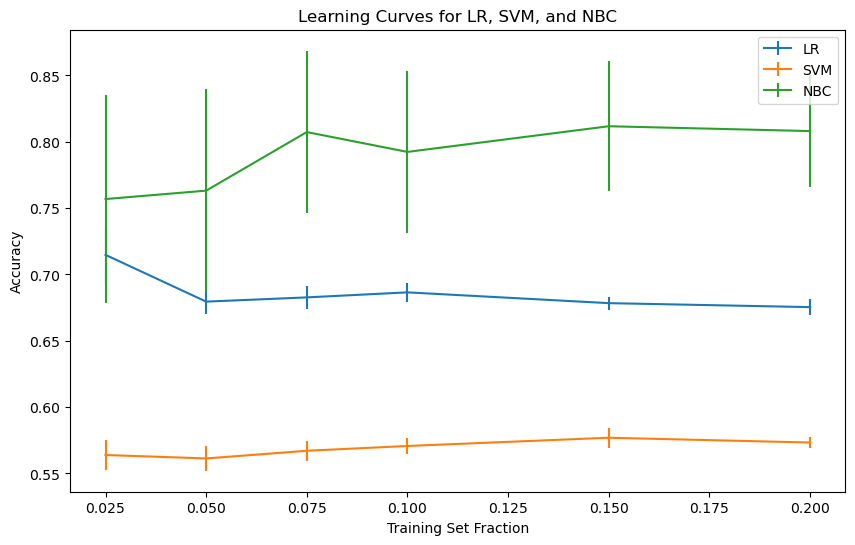

In [331]:
def cross_validation(folds, t_frac, model_type='lr'):
    data_lr_svm = pd.read_csv('trainingSet.csv')
    data_nbc = pd.read_csv('trainingSet_NBC.csv')

    shuffled_data_lr_svm = data_lr_svm.sample(frac=1, random_state=18).reset_index(drop=True)
    shuffled_data_nbc = data_nbc.sample(frac=1, random_state=18).reset_index(drop=True)

    num_folds = 10
    fold_size = len(shuffled_data_lr_svm) // num_folds
    folds_lr_svm = [shuffled_data_lr_svm[i*fold_size:(i+1)*fold_size] for i in range(num_folds)]
    folds_nbc = [shuffled_data_nbc[i*fold_size:(i+1)*fold_size] for i in range(num_folds)]
    
    accuracies = []
    
    for idx in range(num_folds):
        if model_type == 'lr':
            test_set = folds_lr_svm[idx]
            testSet_lr = vector_process(test_set)
            train_set = pd.concat([folds_lr_svm[i] for i in range(num_folds) if i != idx])
            train_set_sampled = train_set.sample(frac=t_frac, random_state=32)
            trainingSet_lr = vector_process(train_set_sampled)
            test_accuracy = lr(trainingSet_lr, testSet_lr)
        elif model_type == 'svm':
            test_set = folds_lr_svm[idx]
            testSet_svm = vector_process(test_set)
            train_set = pd.concat([folds_lr_svm[i] for i in range(num_folds) if i != idx])
            train_set_sampled = train_set.sample(frac=t_frac, random_state=32)
            trainingSet_svm = vector_process(train_set_sampled)
            test_accuracy = svm(trainingSet_svm, testSet_svm)
        elif model_type == 'nbc':
            test_set = folds_nbc[idx]
            train_set = pd.concat([folds_nbc[i] for i in range(num_folds) if i != idx])
            train_set_sampled = train_set.sample(frac=t_frac, random_state=32)
            test_accuracy = nbc(t_frac, train_set_sampled, test_set)
        
        accuracies.append(test_accuracy)
    
    return np.mean(accuracies), np.std(accuracies) / np.sqrt(num_folds)
    
def preprocess_data(df):
    return pd.get_dummies(df)

t_fracs = [0.025, 0.05, 0.075, 0.1, 0.15, 0.2]
models = ['lr', 'svm', 'nbc']
results = {}

for model in models:
    accuracies = []
    errors = []
    for t_frac in t_fracs:
        mean_acc, std_err = cross_validation(None, t_frac, model_type=model)
        accuracies.append(mean_acc)
        errors.append(std_err)
    
    results[model] = (accuracies, errors)

plt.figure(figsize=(10, 6))
for model in models:
    accuracies, errors = results[model]
    plt.errorbar(t_fracs, accuracies, yerr=errors, label=model.upper())

plt.xlabel('Training Set Fraction')
plt.ylabel('Accuracy')
plt.title('Learning Curves for LR, SVM, and NBC')
plt.legend()
plt.show()


The performance of Naive Bayes Classifier (NBC) is significantly better than that of the Logistic Regression (LR) in terms of test accuracy.

In [352]:
accuracies_nbc = results['nbc'][0]
accuracies_lr = results['lr'][0]

In [357]:
from scipy import stats

# Assuming accuracies_nbc and accuracies_lr are lists or arrays of accuracies
t_stat, p_value = stats.ttest_rel(accuracies_nbc, accuracies_lr)

print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: 7.122142204135343, p-value: 0.0008465070067745809


Due to p < 0.05, reject the null hypothesis and conclude that the performance difference between NBC and LR is significant.